✅ Dataset loaded. First few rows:
   Unnamed: 0                track_id                 artists  \
0           0  5SuOikwiRyPMVoIQDJUgSV             Gen Hoshino   
1           1  4qPNDBW1i3p13qLCt0Ki3A            Ben Woodward   
2           2  1iJBSr7s7jYXzM8EGcbK5b  Ingrid Michaelson;ZAYN   
3           3  6lfxq3CG4xtTiEg7opyCyx            Kina Grannis   
4           4  5vjLSffimiIP26QG5WcN2K        Chord Overstreet   

                                          album_name  \
0                                             Comedy   
1                                   Ghost (Acoustic)   
2                                     To Begin Again   
3  Crazy Rich Asians (Original Motion Picture Sou...   
4                                            Hold On   

                   track_name  popularity  duration_ms  explicit  \
0                      Comedy          73       230666     False   
1            Ghost - Acoustic          55       149610     False   
2              To Begin Again     


🔍 Strongest Feature Correlations:
energy ↔️ loudness: 0.768
energy ↔️ acousticness: -0.727
loudness ↔️ acousticness: -0.557
danceability ↔️ valence: 0.456
energy ↔️ speechiness: 0.321
🚀 Training autoencoder with enhanced architecture...
Epoch 1/50
430/430 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1.3339 - val_loss: 0.4906 - learning_rate: 0.0010
Epoch 2/50
430/430 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4583 - val_loss: 0.3492 - learning_rate: 0.0010
Epoch 3/50
430/430 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3528 - val_loss: 0.2859 - learning_rate: 0.0010
Epoch 4/50
430/430 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3018 - val_loss: 0.2395 - learning_rate: 0.0010
Epoch 5/50
430/430 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2762 - val_loss: 0.2139 - learning_rate: 0.0010
Epoch 6/50
430/430 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2560 - val_loss: 0.1759 - learning_rate: 0.0010
Epoch 7/50
430/430 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2388 - val_loss: 0.1510 - learning_rate:

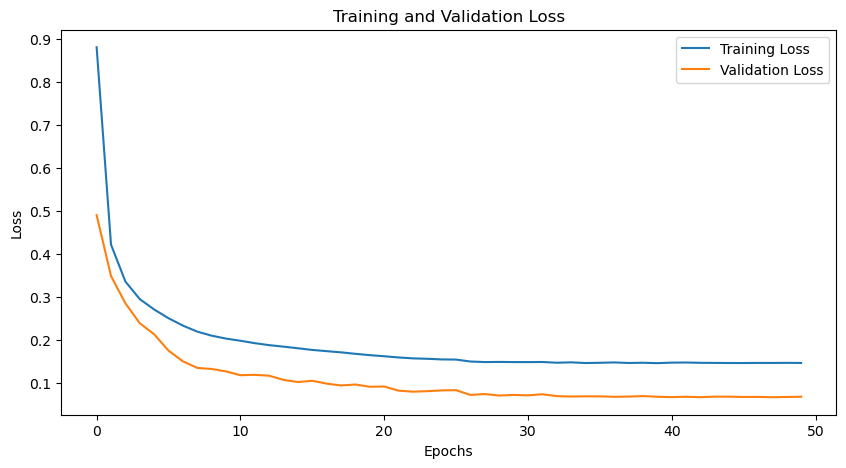

2146/2146 ━━━━━━━━━━━━━━━━━━━━ 1s 591us/step

🔹 Autoencoder Accuracy Metrics:
   ✅ Mean Squared Error (MSE): 0.04145
   ✅ R² Score: 0.95855

🔍 Generating latent representations...
2146/2146 ━━━━━━━━━━━━━━━━━━━━ 1s 517us/step

📊 Generating genre distribution visualization...



🎵 Genre Distribution:
mandopop: 952 tracks
country: 920 tracks
salsa: 895 tracks
pop-film: 877 tracks
acoustic: 874 tracks
j-pop: 873 tracks
cantopop: 867 tracks
soul: 865 tracks
rock: 858 tracks
j-rock: 850 tracks
pop: 849 tracks
honky-tonk: 845 tracks
singer-songwriter: 843 tracks
songwriter: 843 tracks
swedish: 843 tracks
j-idol: 833 tracks
k-pop: 826 tracks
latin: 823 tracks
folk: 820 tracks
rock-n-roll: 818 tracks
dance: 815 tracks
house: 814 tracks
malay: 813 tracks
forro: 810 tracks
punk: 804 tracks
indie-pop: 803 tracks
grunge: 803 tracks
rockabilly: 801 tracks
electro: 798 tracks
punk-rock: 798 tracks
indie: 797 tracks
edm: 796 tracks
indian: 794 tracks
blues: 790 tracks
party: 787 tracks
power-pop: 784 tracks
alternative: 780 tracks
gospel: 775 tracks
alt-rock: 773 tracks
jazz: 767 tracks
disco: 759 tracks
reggae: 753 tracks
spanish: 750 tracks
reggaeton: 749 tracks
latino: 746 tracks
world-music: 743 tracks
hard-rock: 740 tracks
children: 735 tracks
metal: 735 tracks
synth-

In [1]:
import pandas as pd
import numpy as np
from datasets import load_dataset
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l1_l2
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import plotly.express as px
import plotly.graph_objects as go

# Enhanced data preprocessing
def load_and_preprocess_data():
    ds = load_dataset("maharshipandya/spotify-tracks-dataset")
    df = pd.DataFrame(ds["train"])
    
    print("✅ Dataset loaded. First few rows:")
    print(df.head(), "\n")

    # More robust encoding
    le = LabelEncoder()
    df['track_genre_encoded'] = le.fit_transform(df['track_genre'])

    numeric_features = [
        'danceability', 'energy', 'loudness', 'speechiness', 
        'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
        'track_genre_encoded' 
    ]
    
    # More thorough data cleaning
    df = df.dropna(subset=numeric_features).reset_index(drop=True)
    
    # Remove outliers using IQR
    for feature in numeric_features[:-1]:  # Skip the encoded genre
        Q1 = df[feature].quantile(0.25)
        Q3 = df[feature].quantile(0.75)
        IQR = Q3 - Q1
        df = df[~((df[feature] < (Q1 - 1.5 * IQR)) | (df[feature] > (Q3 + 1.5 * IQR)))]
    
    X = df[numeric_features].values
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    return df, X_scaled, numeric_features

def plot_feature_heatmap(df, numeric_features):
    # Calculate correlation matrix
    correlation_matrix = df[numeric_features].corr()
    
    # Create heatmap using plotly
    fig = go.Figure(data=go.Heatmap(
        z=correlation_matrix,
        x=numeric_features,
        y=numeric_features,
        colorscale='RdBu',
        zmin=-1,
        zmax=1,
        text=np.round(correlation_matrix, 2),
        texttemplate='%{text}',
        textfont={"size": 10},
        hoverongaps=False
    ))
    
    fig.update_layout(
        title='Feature Correlation Heatmap',
        width=900,
        height=900,
        xaxis_tickangle=-45
    )
    
    fig.show()
    
    print("\n🔍 Strongest Feature Correlations:")
    correlations = []
    for i in range(len(numeric_features)):
        for j in range(i+1, len(numeric_features)):
            corr = correlation_matrix.iloc[i,j]
            if abs(corr) > 0.3: 
                correlations.append((
                    numeric_features[i],
                    numeric_features[j],
                    corr
                ))
    
    correlations.sort(key=lambda x: abs(x[2]), reverse=True)
    
    for feat1, feat2, corr in correlations:
        print(f"{feat1} ↔️ {feat2}: {corr:.3f}")

# Enhanced autoencoder architecture
def build_autoencoder(input_dim, encoding_dim=8):
    # Input layer
    input_layer = Input(shape=(input_dim,))
    
    # Encoder with more layers and regularization
    encoded = Dense(64, activation='relu', kernel_regularizer=l1_l2(l1=1e-5, l2=1e-4))(input_layer)
    encoded = BatchNormalization()(encoded)
    encoded = Dropout(0.2)(encoded)
    
    encoded = Dense(32, activation='relu', kernel_regularizer=l1_l2(l1=1e-5, l2=1e-4))(encoded)
    encoded = BatchNormalization()(encoded)
    encoded = Dropout(0.2)(encoded)
    
    # Bottleneck layer
    encoded = Dense(encoding_dim, activation='relu', kernel_regularizer=l1_l2(l1=1e-5, l2=1e-4))(encoded)
    
    # Decoder
    decoded = Dense(32, activation='relu')(encoded)
    decoded = BatchNormalization()(decoded)
    decoded = Dropout(0.2)(decoded)
    
    decoded = Dense(64, activation='relu')(decoded)
    decoded = BatchNormalization()(decoded)
    decoded = Dropout(0.2)(decoded)
    
    # Output layer
    decoded = Dense(input_dim, activation='linear')(decoded)
    
    autoencoder = Model(inputs=input_layer, outputs=decoded)
    encoder = Model(inputs=input_layer, outputs=encoded)
    
    autoencoder.compile(optimizer='adam', loss='mse')
    return autoencoder, encoder

# Enhanced training process
def train_autoencoder(autoencoder, X_scaled, epochs=50, batch_size=128):
    callbacks = [
        EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
        ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6)
    ]
    
    history = autoencoder.fit(
        X_scaled, X_scaled,
        epochs=epochs,
        batch_size=batch_size,
        validation_split=0.2,  # Increased validation split
        callbacks=callbacks,
        verbose=1
    )
    
    # Plot training history
    plt.figure(figsize=(10, 5))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    
    return history

def evaluate_autoencoder(autoencoder, X_scaled):
    X_reconstructed = autoencoder.predict(X_scaled)
    mse = mean_squared_error(X_scaled, X_reconstructed)
    r2 = r2_score(X_scaled, X_reconstructed)
    
    print(f"\n🔹 Autoencoder Accuracy Metrics:")
    print(f"   ✅ Mean Squared Error (MSE): {mse:.5f}")
    print(f"   ✅ R² Score: {r2:.5f}")

def build_knn_model(latent_features, metric='cosine'):
    knn = NearestNeighbors(metric=metric, algorithm='brute')
    knn.fit(latent_features)
    return knn

def plot_tracks_by_genre(latent_features, df):
    pca = PCA(n_components=3)
    latent_3d = pca.fit_transform(latent_features)
    
    plot_df = pd.DataFrame(
        latent_3d, 
        columns=['PC1', 'PC2', 'PC3']
    )
    plot_df['Genre'] = df['track_genre']
    plot_df['Track'] = df['track_name']
    plot_df['Artist'] = df['artists']
    
    fig = px.scatter_3d(
        plot_df, 
        x='PC1', 
        y='PC2', 
        z='PC3',
        color='Genre',
        hover_data=['Track', 'Artist'],
        title='3D Interactive Visualization of Tracks by Genre',
        labels={'PC1': 'First Principal Component',
                'PC2': 'Second Principal Component',
                'PC3': 'Third Principal Component'}
    )
    
    fig.update_layout(
        scene = dict(
            xaxis_title='PC1',
            yaxis_title='PC2',
            zaxis_title='PC3'
        ),
        width=1200,
        height=800,
        showlegend=True,
        legend=dict(
            yanchor="top",
            y=0.99,
            xanchor="left",
            x=0.85
        )
    )
    
    fig.show()

    genre_dist = df['track_genre'].value_counts()
    print("\n🎵 Genre Distribution:")
    for genre, count in genre_dist.items():
        print(f"{genre}: {count} tracks")

def get_track_recommendations(track_index, n_recommendations=5):
    print("\n🎵 Selected Track:")
    selected_track = df.iloc[track_index]
    print(f"Track: {selected_track['track_name']}")
    print(f"Artist: {selected_track['artists']}")
    print(f"Genre: {selected_track['track_genre']}")

    track_vector = latent_features[track_index].reshape(1, -1)
    distances, indices = knn.kneighbors(track_vector, n_neighbors=20)  
    similar_indices = indices.flatten()[1:]  
    similar_tracks = df.iloc[similar_indices]

    selected_genre = selected_track['track_genre']
    filtered_tracks = similar_tracks[similar_tracks['track_genre'] != selected_genre]

    recommendations = similar_tracks.head(n_recommendations)

    print("\n🎶 Recommended Tracks (Different Genre):")
    return recommendations[['track_name', 'artists', 'track_genre']]

def main():
    global df, latent_features, knn
    
    df, X_scaled, numeric_features = load_and_preprocess_data()
    plot_feature_heatmap(df, numeric_features)
    input_dim = X_scaled.shape[1]  
    encoding_dim = 8  # Increased encoding dimension
    
    autoencoder, encoder = build_autoencoder(input_dim, encoding_dim)
    
    print("🚀 Training autoencoder with enhanced architecture...")
    history = train_autoencoder(autoencoder, X_scaled, epochs=50, batch_size=128)
    
    evaluate_autoencoder(autoencoder, X_scaled)

    print("\n🔍 Generating latent representations...")
    latent_features = encoder.predict(X_scaled)
    knn = build_knn_model(latent_features, metric='cosine')
    
    print("\n📊 Generating genre distribution visualization...")
    plot_tracks_by_genre(latent_features, df)
    
    sample_track_index = 15
    recommendations = get_track_recommendations(sample_track_index)
    print(recommendations)

if __name__ == "__main__":
    main()

In [ ]:
!pip install jupyter